In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

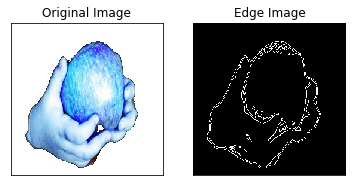

In [156]:
img = cv2.imread('./test_output_images_apple/n07739125_11608.jpg')

imgray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(imgray,127,255,0)


edges = cv2.Canny(thresh,100,200)
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

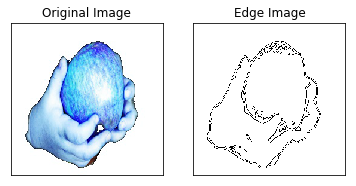

In [157]:
for i in range(edges.shape[0]):
    for j in range(edges.shape[1]):
        edges[i,j]=255-edges[i,j]
        
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()        

(<matplotlib.axes._subplots.AxesSubplot at 0x7fb1f1d4b3d0>,
 <matplotlib.image.AxesImage at 0x7fb1f2048750>)

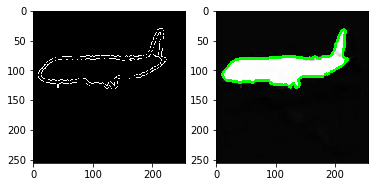

In [117]:
import numpy as np
import cv2

imgray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(imgray,127,255,0)
image, contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
img = cv2.drawContours(img, contours, -1, (0,255,0), 3)
plt.subplot(121),plt.imshow(img,cmap = 'gray')

#cnt = contours[1]
img = cv2.drawContours(img, [cnt], 0, (0,255,0), 1)
plt.subplot(122),plt.imshow(img,cmap = 'gray')

edges = cv2.Canny(img,100,200)
plt.subplot(121),plt.imshow(edges,cmap = 'gray')

In [99]:
def get_contour(image,color):
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if image[i,j,0]== color[0] and image[i,j,1]== color[1] and image[i,j,2]== color[2]:
                image[i,j]=(0,0,0)
            else:
                 image[i,j]=(255,255,255)   
    return image

[0, 255, 0]
(256, 256, 3)


(<matplotlib.axes._subplots.AxesSubplot at 0x7fb1f1ec4ad0>,
 <matplotlib.image.AxesImage at 0x7fb1f25b6e50>)

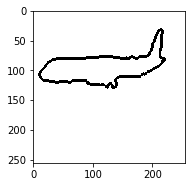

In [118]:
contour = get_contour(img,[0,255,0])
print(contour.shape)
plt.subplot(121),plt.imshow(contour,cmap = 'gray')

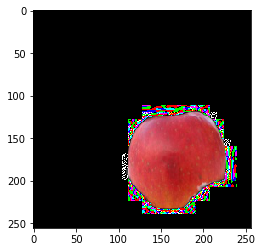

In [137]:
import timeit
image = cv2.imread('./test_output_images_apple/n07739125_2161.jpg')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
image[image==255] = 0
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [187]:
# script to get the edge map of a paricular folder and saving it to an output folder 

def get_pix2pix_edge_map(img_name):
    img = cv2.imread(img_name)
    #img =cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    imgray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    ret,thresh = cv2.threshold(imgray,127,255,0)
    edges = cv2.Canny(thresh,100,200)
    
    for i in range(edges.shape[0]):
        for j in range(edges.shape[1]):
            edges[i,j]=255-edges[i,j]
    return edges   

import os

image_folder = './images_strawberry//' #the segmented out image input folder 
edge_folder = image_folder.replace('images','pix2pix') #the edge folder in which to save the pix2pix edges
if not os.path.exists(edge_folder):
    os.mkdir(edge_folder)

rgb_pths = os.listdir(image_folder)

for rgb_pth in rgb_pths:
    #print(rgb_pth)
    pix2pix_edges = get_pix2pix_edge_map(os.path.join(image_folder,rgb_pth))
    cv2.imwrite( os.path.join(edge_folder,rgb_pth) ,pix2pix_edges)

In [2]:
import cv2
import os
from PIL import Image

base_path= '/home/arnab/tinkering-projects/data/scribble_clean_new/scribbles/soccer'

paths= os.listdir(base_path)
for pth in paths:
    path = os.path.join(base_path,pth)
    png = Image.open(path)
    try:
        background = Image.new("RGB",png.size,(255,255,255))
        background.paste(png,mask=png.split()[3])
        background.save(path)
    except:
        pass
                
    #plt.imshow(background)